# CNN for MNIST using Keras

This program demonstrates training a simple [Convolutional Neural Network](https://developers.google.com/machine-learning/glossary/#convolutional_neural_network) (CNN) to classify MNIST dataset. This program is created by modifying the CNN tutorial (https://www.tensorflow.org/tutorials/images/cnn).

### Import TensorFlow

In [1]:
# import tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Download and prepare the MNIST dataset

MNIST (Modified National Institute of Standards and Technology database) is a dataset of labeled images of handwritten digits from 0 through 9. The dataset has a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

In [20]:
# load fashion_mnist dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# normalizes pixel values between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
# check shapes of images and labels of train and test data
print(train_images.shape, test_images.shape)  

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

(60000, 28, 28, 1) (10000, 28, 28, 1)


### Verify the data

To verify that the dataset looks correct, let's plot the first 16 images from the training set and display the class name below each image.


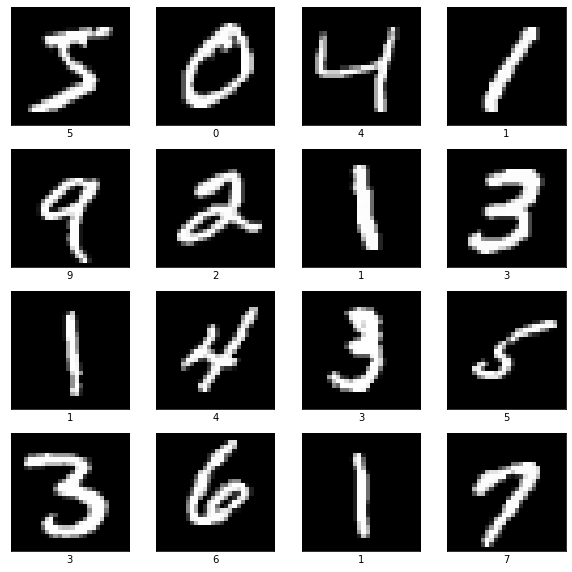

In [22]:
# define class names
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

plt.figure(figsize=(10, 10))
for i in range(16):
     plt.subplot(4, 4, i+1)
     #plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
     plt.xticks([])
     plt.yticks([])
     plt.grid(False)
     plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
     #plt.imshow(train_images[i], cmap=plt.cm.binary)
     plt.xlabel(class_names[train_labels[i]])
plt.show()

### Create the convolutional base

CNN takes as input a tensor of size (image height, image width, color channel) excluding batch size. MNIST data has one color channel (because it is a black and white image), whereas a color image has three channels (R,G,B). In this example, we will define a CNN that handles inputs of size (28, 28, 1), which is the MNIST image format. Pass this value as the first layer's input_shape parameter.


In [28]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Let's display the architecture of our model so far.

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically,  as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

### Add Dense layers on top
To complete the model, you will feed the last output tensor from the convolutional base (of shape (3, 3, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top. MNIST has 10 output classes, so you use a final Dense layer with 10 outputs.

In [29]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Here's the complete architecture of our model.

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

As you can see, our (3, 3, 64) outputs were flattened into vectors of shape (576) before going through two Dense layers.

### Compile and train the model

In [38]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_split=0.25)


Epoch 1/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.0238 - accuracy: 0.9916 - val_loss: 0.0736 - val_accuracy: 0.9803
Epoch 2/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.0216 - accuracy: 0.9931 - val_loss: 0.0723 - val_accuracy: 0.9800
Epoch 3/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.0203 - accuracy: 0.9934 - val_loss: 0.0746 - val_accuracy: 0.9814
Epoch 4/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.0183 - accuracy: 0.9943 - val_loss: 0.0745 - val_accuracy: 0.9809
Epoch 5/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.0193 - accuracy: 0.9937 - val_loss: 0.0821 - val_accuracy: 0.9793
Epoch 6/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.0192 - accuracy: 0.9939 - val_loss: 0.0751 - val_accuracy: 0.9821
Epoch 7/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.0186 - accuracy: 0.9938 - val_loss: 0.0721 - val_accuracy:

### Evaluate the model

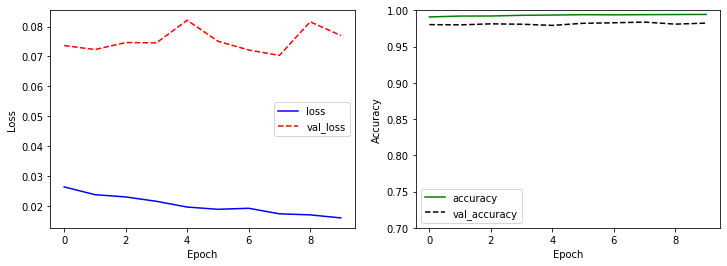

313/313 - 0s - loss: 0.0676 - accuracy: 0.9845


In [42]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

# test
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [40]:
print(test_acc)

0.984499990940094


Our simple CNN has achieved a test accuracy of over 98%. Very good for a few lines of code! 